In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import pkg_resources
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import numpy
import colorsys

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

In [2]:
model_families = [
    ['wiki_cnn_v3_100', 'wiki_cnn_v3_101', 'wiki_cnn_v3_102'],
    ['wiki_debias_cnn_v3_100', 'wiki_debias_cnn_v3_101', 'wiki_debias_cnn_v3_102'],
]

In [3]:
# Read the scored data into DataFrame
df = pd.read_csv('eval_datasets/bias_madlibs_77k_scored.csv')

In [4]:
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(df, 'text', terms)

In [5]:
eq_diff = model_bias_analysis.per_subgroup_aucs(df, terms, model_families, 'label')
# sort to guarantee deterministic output
#eq_diff.sort_values(by=['model_family'], inplace=True)
#eq_diff.reset_index(drop=True, inplace=True)

In [6]:
U_VALUE = 0
P_VALUE = 1

In [20]:
def MWU_2D_plot(model_families, groups, 
                labelx, labely,
                displayed_labelx, displayed_labely,
                value_to_display=U_VALUE, factor=1):
    colors = sns.color_palette(None, len(groups))
    formats = ["^", "o"]
    plt.figure(figsize=(20, 10))
    markerlegend = []
    colorlegend = []
    for ind, model in enumerate(model_families):
        name = model_bias_analysis.model_family_name(model)
        markerlegend.append(mlines.Line2D([], [], 
                                          marker=formats[ind], 
                                          markersize=10, 
                                          label=name))
    for gind, group in enumerate(groups):
        colorlegend.append(mlines.Line2D([], [], 
                                         color=colors[gind], 
                                         markersize=10, 
                                         label=group))
        for ind, model in enumerate(model_families):
            x = []
            y = []
            lxerr = []
            rxerr = []
            lyerr = []
            ryerr = []
            name = model_bias_analysis.model_family_name(model)
            cross = name + labelx
            within = name + labely
            the_list = list(eq_diff[eq_diff['subgroup'] == group]
                            [cross])[0]
            l = sorted([t[value_to_display] * factor for t in the_list])
            #print(group, l)
            x.append(l[1])
            lxerr.append(l[1] - l[0])
            rxerr.append(l[2] - l[1])
            the_list = list(eq_diff[eq_diff['subgroup'] == group]
                            [within])[0]
            if len(the_list) == 1:
                the_list = the_list[0]
            l = sorted([t[value_to_display] * factor for t in the_list])
            y.append(l[1])
            lyerr.append(l[1] - l[0])
            ryerr.append(l[2] - l[1])
            size = len(df[df[group]&~df['label']])
            #print(group, l)
            plt.errorbar(x, y, xerr = [lxerr, rxerr], 
                         yerr=[lyerr, ryerr], 
                         fmt = formats[ind], 
                         color = colors[gind], 
                         markersize=size/100)
    plt.xlabel(displayed_labelx)
    plt.ylabel(displayed_labely)
    plt.legend(handles=markerlegend + colorlegend, ncol=2)

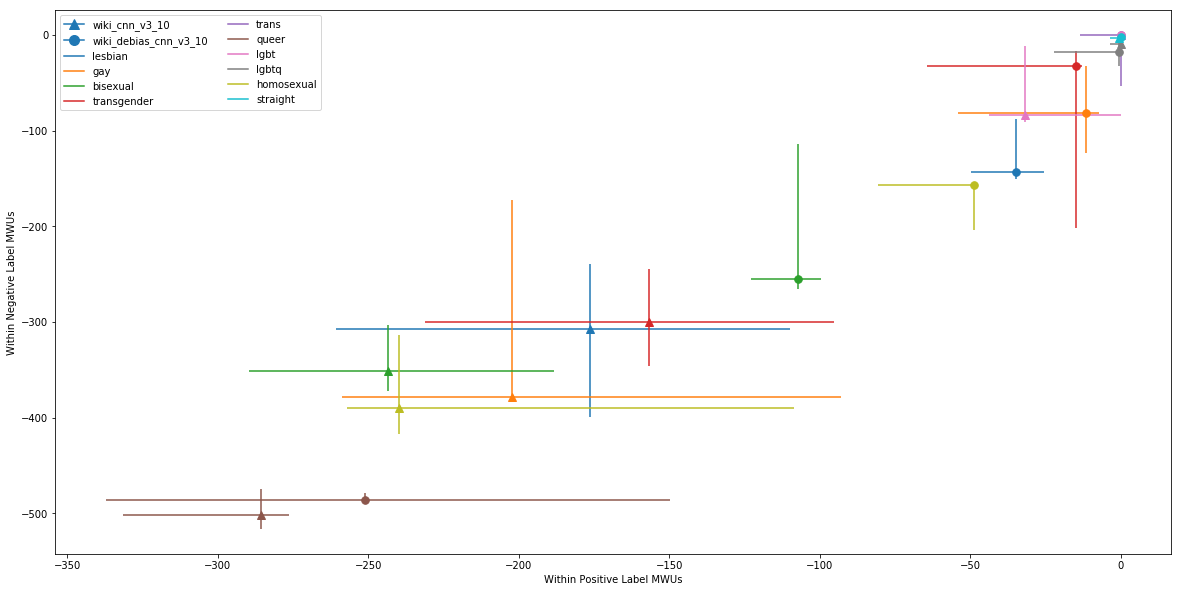

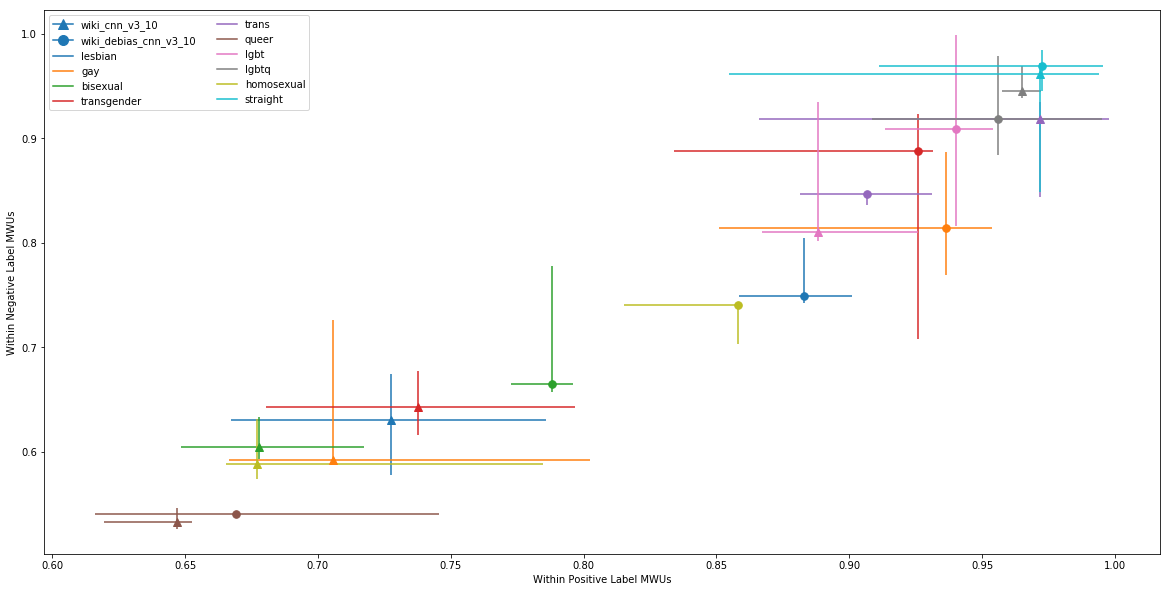

In [21]:
MWU_2D_plot(model_families, terms[:10], 
            '_within_positive_label_mwus', 
            '_within_negative_label_mwus',
            'Within Positive Label MWUs',
            'Within Negative Label MWUs',
            value_to_display=P_VALUE)
MWU_2D_plot(model_families, terms[:10], 
            '_within_positive_label_mwus', 
            '_within_negative_label_mwus',
            'Within Positive Label MWUs',
            'Within Negative Label MWUs',
            value_to_display=U_VALUE)

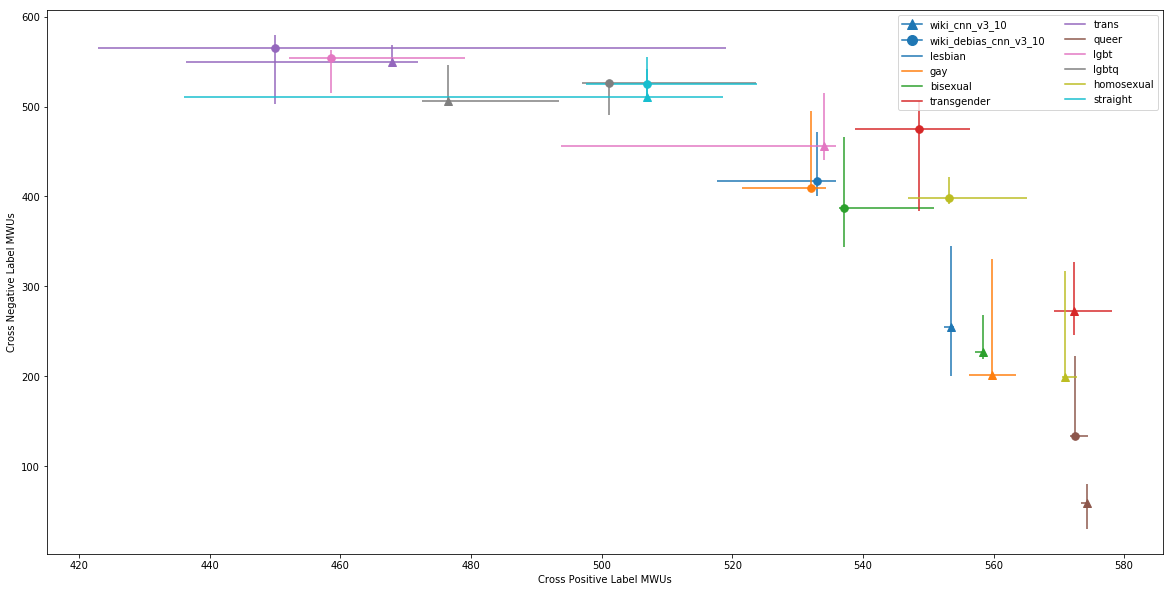

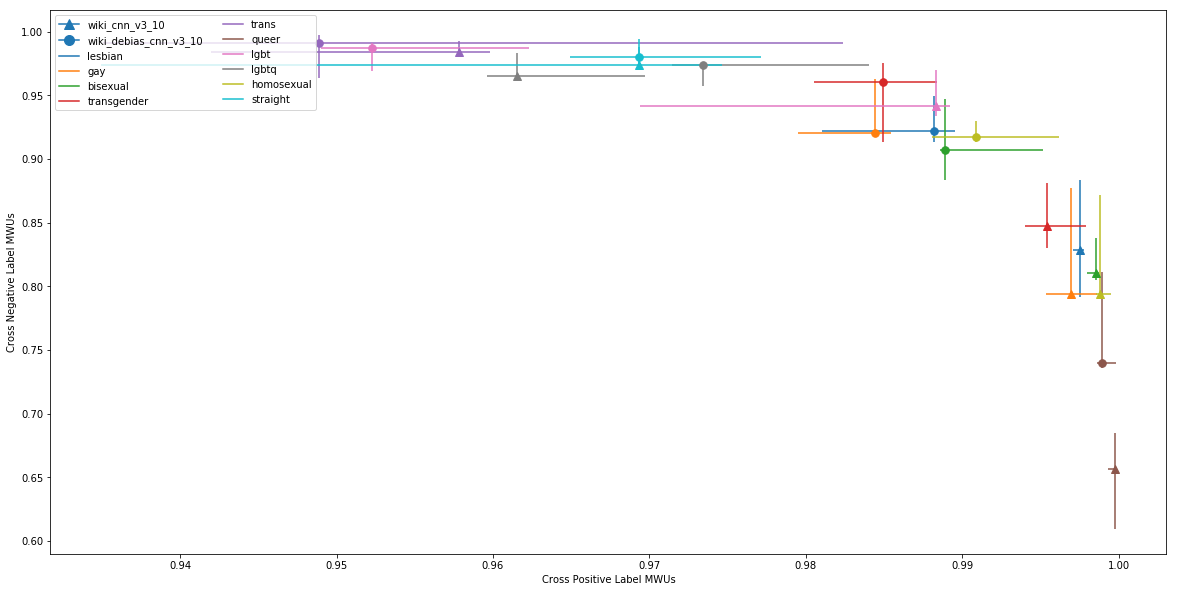

In [22]:
MWU_2D_plot(model_families, terms[:10], 
            '_cross_subgroup_positive_mwus', 
            '_cross_subgroup_negative_mwus',
            'Cross Positive Label MWUs',
            'Cross Negative Label MWUs',
            value_to_display=P_VALUE, factor=-1)
MWU_2D_plot(model_families, terms[:10], 
            '_cross_subgroup_positive_mwus', 
            '_cross_subgroup_negative_mwus',
            'Cross Positive Label MWUs',
            'Cross Negative Label MWUs',
            value_to_display=U_VALUE)

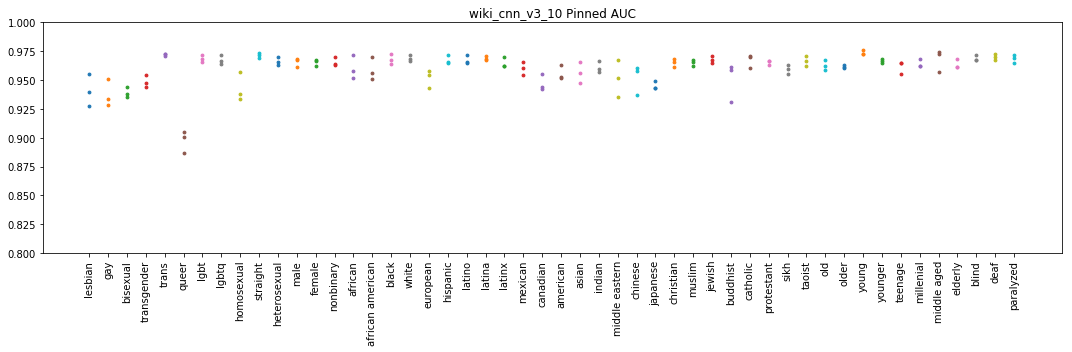

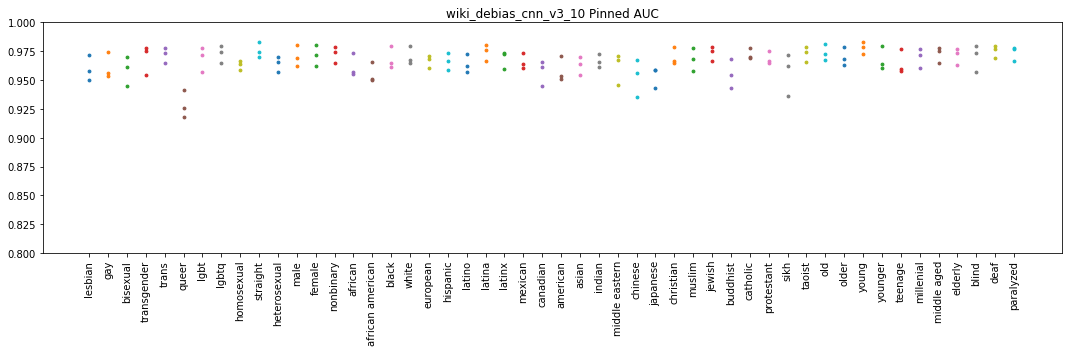

In [177]:
pinned_auc_results = model_bias_analysis.per_subgroup_aucs(df, terms, model_families, 'label')
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_aucs',
        title=name + ' Pinned AUC',
        y_lim=(0.8, 1.0))

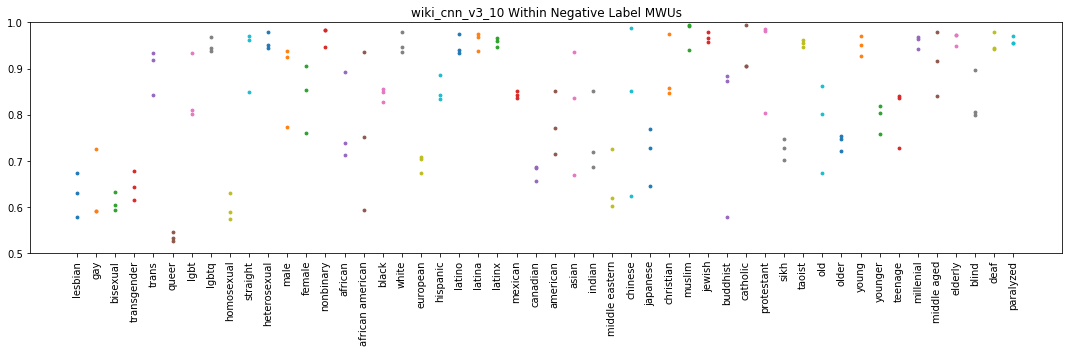

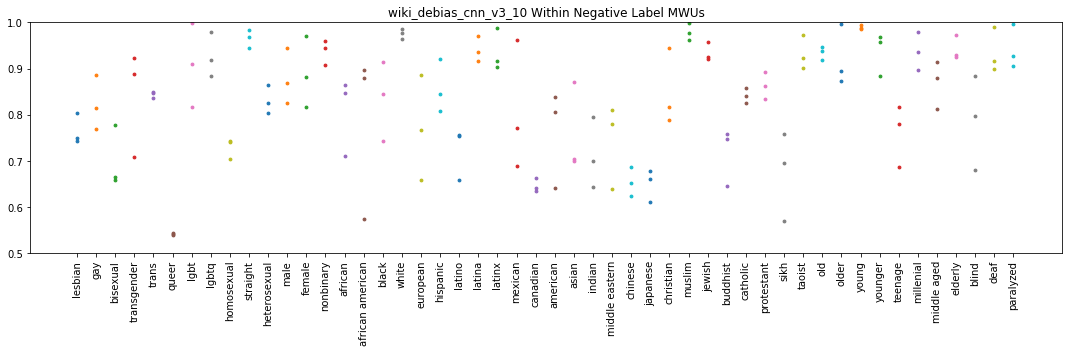

In [178]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_negative_label_mwus',
        title=name + ' Within Negative Label MWUs',
        y_lim=(0.5, 1.0))

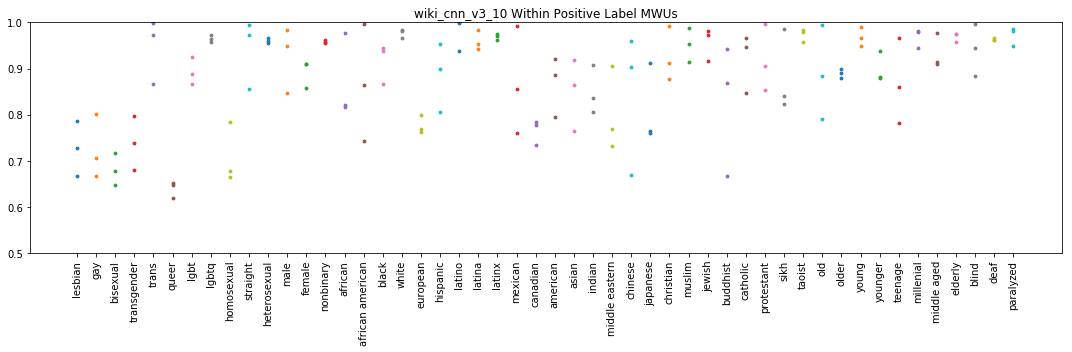

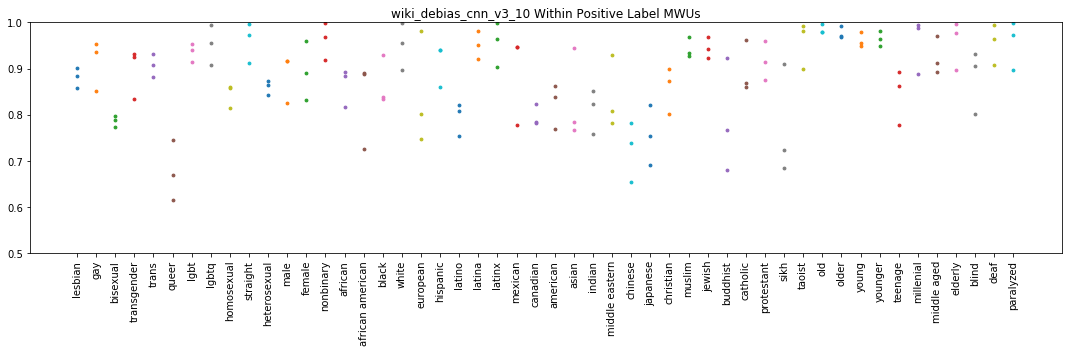

In [179]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_positive_label_mwus',
        title=name + ' Within Positive Label MWUs',
        y_lim=(0.5, 1.0))

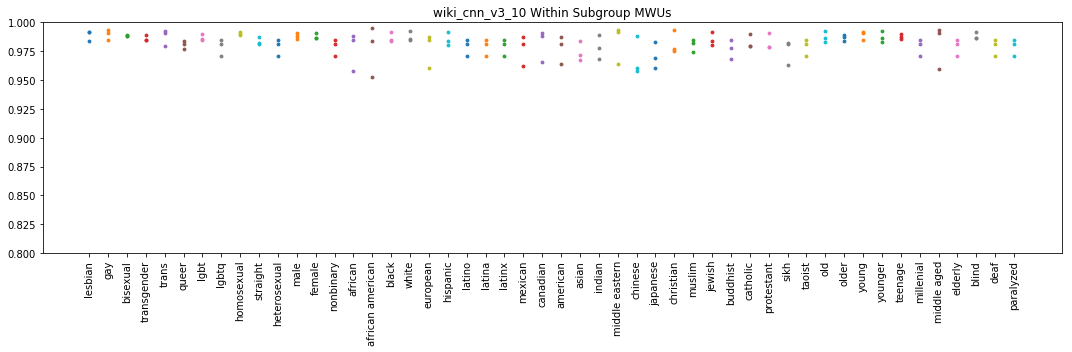

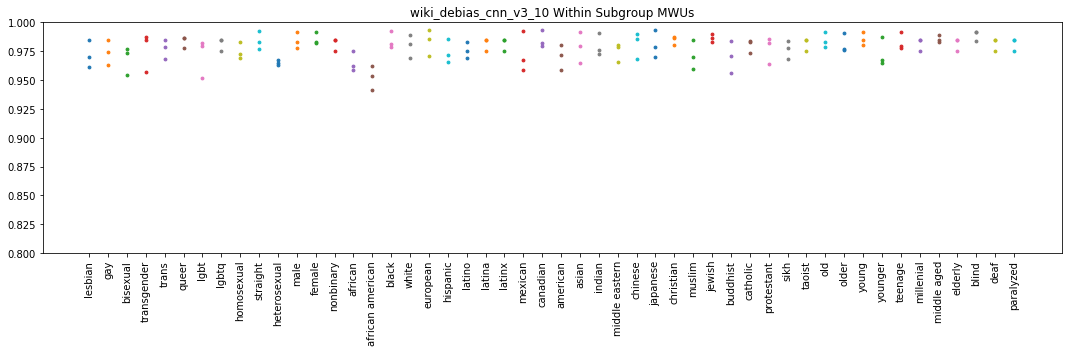

In [180]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_subgroup_mwus',
        title=name + ' Within Subgroup MWUs',
        y_lim=(0.8, 1.0))

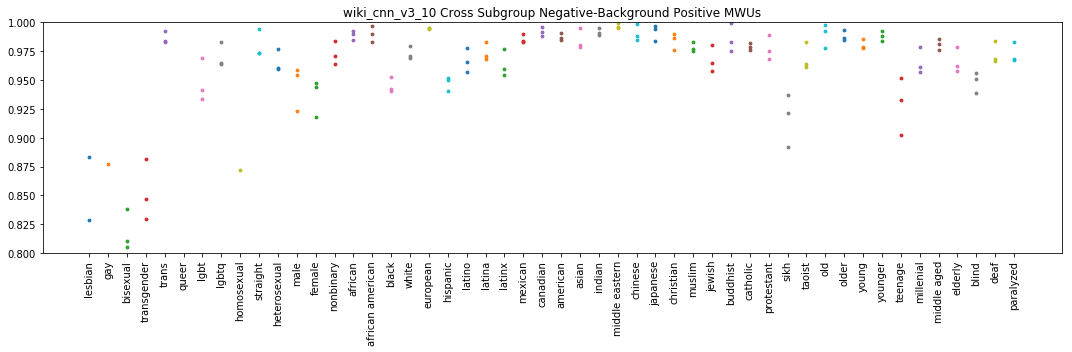

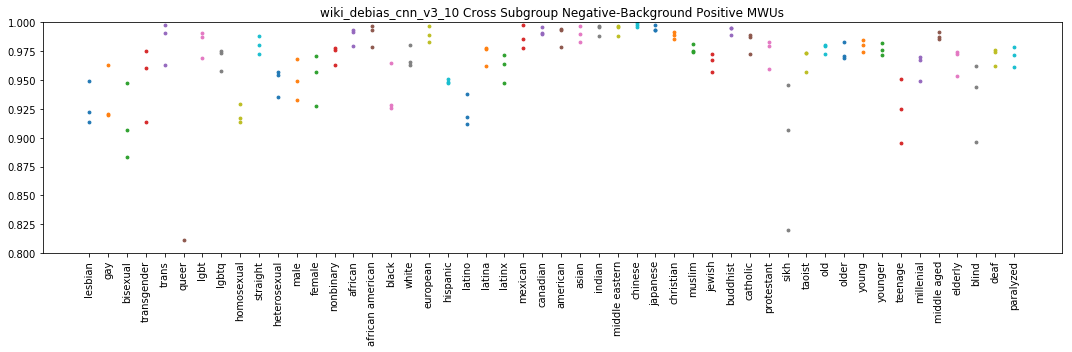

In [181]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_cross_subgroup_negative_mwus',
        title=name + ' Cross Subgroup Negative-Background Positive MWUs',
        y_lim=(0.8, 1.0))

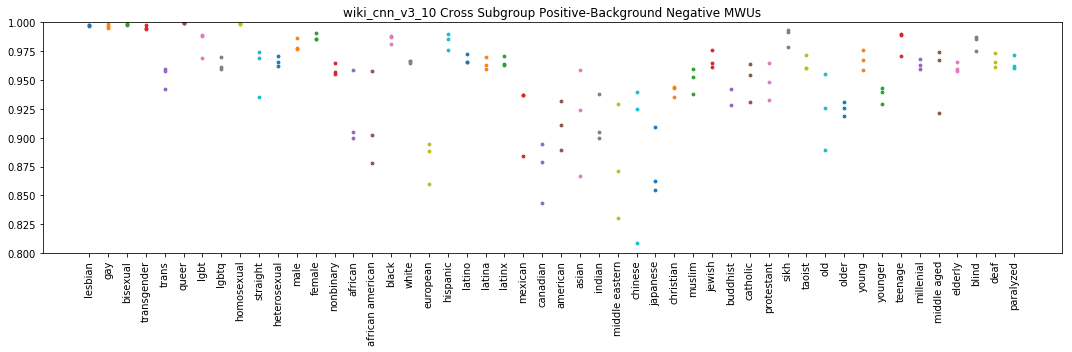

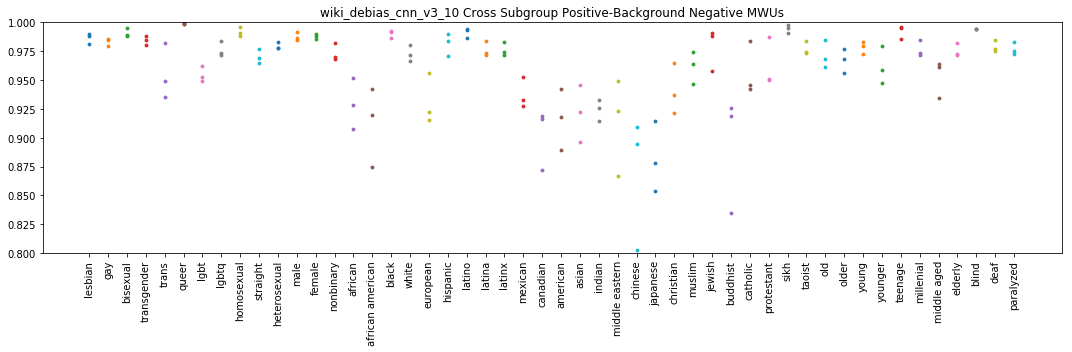

In [182]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_cross_subgroup_positive_mwus',
        title=name + ' Cross Subgroup Positive-Background Negative MWUs',
        y_lim=(0.8, 1.0))